<a href="https://colab.research.google.com/github/cho52o/library_project2019/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본 패키지 불러오기

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 일단 import 
%matplotlib inline  
import matplotlib
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)

In [ ]:
print("Matplotlib version", matplotlib.__version__)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Matplotlib version 3.1.1


In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic Eco


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["figure.figsize"] = (14,8)

#지난 2018-06-01 ~ 2019-09-30 까지의 대출데이터

In [ ]:
so = pd.read_csv('/content/drive/My Drive/소통형도서관_프로젝트/자료/대출목록.csv')
best = pd.read_csv('/content/drive/My Drive/소통형도서관_프로젝트/자료/베스트_이용도서.csv')

In [ ]:
so.head(4)

,학과,등록번호,청구기호,서명,저자,대출일
0,간호학과,569943,158.2 하69ㅍKㄱ,대화기술: 생각을 전하고 마음을 사로잡는 기술,하이브로 무사시,20180710
1,간호학과,594738,910.41 한49ㅂ 2007,바람의 딸 걸어서 지구 세바퀴 반,한비야,20180801
2,간호학과,587517,181.2184 맹71시,孟子論,신동준,20180601
3,간호학과,604495,320.1 M149pKㅅ,(가장 정직한 정치 교과서) 군주론,신재일,20180604


## 등록번호와 저자 제외

In [ ]:
so_1 = so.iloc[:, :]
so_2 = so.loc[:,['학과','청구기호','서명','대출일']]

##공과대학 대여권수

In [ ]:
so_eg = so_2[so_2['학과'].isin(['산업경영공학과','컴퓨터공학과','정보통신공학과','멀티미디어공학전공','멀티미디어학부','멀티미디어영상전공',
                                   '토목·건축공학부','미디어영상전공','전기전자공학과' ,'건축공학전공',
                                   '토목환경공학전공','기계공학과','화학공학과','컴퓨터무인통신기술학과'])]

#신규인'신소재공학과','스마트융합공학부'제외 , 재학생이 없을것으로 판단 '공학교육 혁신센터 제외'
so_eg.shape

(1344, 4)

##사범대학 대여권수

In [ ]:
so_edu = so_2[so_2['학과'].isin(['국어교육과','영어교육과','교육학과','역사교육과','미술교육과','수학교육과'])]
#교육연수원, 교직부 제외
so_edu.shape

(2976, 4)

##문과대학 대여권수

In [ ]:
so_la =  so_2[so_2['학과'].isin(['국어국문·창작학과','영어영문학과','외국어문학부','일어일문학전공','프랑스어문학전공',
                                    '문헌정보학과','사학과','기독교학과','인문학부 철학상담학전공','일본·프랑스어문학과'])]
so_la.shape

(4758, 4)

##경상대학 대여권수

In [ ]:
so_ec =  so_2[so_2['학과'].isin(['경영학과','회계학과','무역학과','경제학부','경제학전공',
                                    '중국경제통상학전공','컨벤션호텔경영학과','비즈니스통계학과'])]
#방촌국제화 훈련단 제외
so_ec.shape

(2395, 4)

##법정대학 대여권수

In [ ]:
so_ss =  so_2[so_2['학과'].isin(['법학부','행정·경찰학부' '행정학전공','경찰학전공 모집전공','정치·언론학과' ,'사회복지학과','아동복지학과','도시부동산학과'])]
so_ss.shape

(1778, 4)

##생명나노과학대학 대여권수

In [ ]:
so_ls =  so_2[so_2['학과'].isin(['생명시스템과학과' ,'식품영양학과','화학과' ,'수학과','간호학과','스포츠과학과','화공신소재공학과'])]
so_ls.shape

(2525, 4)

##사회적경제융합대학 대여권수

In [ ]:
so_se =  so_2[so_2['학과'].isin(['사회복지학과','아동복지학과'])]
                               
#상담심리학과 , 사회적경제기업학과 , 빅데이터응용학과 신규 생성학과 제외
so_se.shape

(820, 4)

##린튼글로벌비지니스 대여권수

In [ ]:
so_gb =  so_2[so_2['학과'].isin(['글로벌비즈니스전공','글로벌IT경영전공'])]
so_gb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
학과      0 non-null object
청구기호    0 non-null object
서명      0 non-null object
대출일     0 non-null object
dtypes: object(4)
memory usage: 0.0+ bytes


##조형예술학부 대여권수

In [ ]:
so_art =  so_2[so_2['학과'].isin(['조형예술학부','융합디자인전공','회화전공','의류학전공'])]
so_art.shape

(860, 4)

##자유전공학부 대여권수

In [ ]:
so_free =  so_2[so_2['학과'].isin(['자유전공학부'])]
so_free.shape

(60, 4)

## 대학별 정리

1)so_eg #공과대

2)so_edu #사범대

3)so_la #문과대

4)so_ec #경상대학

5)so_ss #법정대학

6)so_ls #생명나노대학

7)so_se #사회적경제융합대학

8)so_gb #린튼글로벌비지니스 - 값이 없음 

9)so_art #조형예술학부

10)so_free #자유전공학부


### 데이터 정리

In [ ]:
so_eg.청구기호 = so_eg.청구기호.str.slice(0, 3)
so_eg.대출일 = so_eg.대출일.str.slice(4, 6)
so_edu.청구기호 = so_edu.청구기호.str.slice(0, 3)
so_edu.대출일 = so_edu.대출일.str.slice(4, 6)
so_la.청구기호 = so_la.청구기호.str.slice(0, 3)
so_la.대출일 = so_la.대출일.str.slice(4, 6)
so_ec.청구기호 = so_ec.청구기호.str.slice(0, 3)
so_ec.대출일 = so_ec.대출일.str.slice(4, 6)
so_ss.청구기호 = so_ss.청구기호.str.slice(0, 3)
so_ss.대출일 = so_ss.대출일.str.slice(4, 6)
so_ls.청구기호 = so_ls.청구기호.str.slice(0, 3)
so_ls.대출일 = so_ls.대출일.str.slice(4, 6)
so_se.청구기호 = so_se.청구기호.str.slice(0, 3)
so_se.대출일 = so_se.대출일.str.slice(4, 6)
so_gb.청구기호 = so_gb.청구기호.str.slice(0, 3)
so_gb.대출일 = so_gb.대출일.str.slice(4, 6)
so_art.청구기호 = so_art.청구기호.str.slice(0, 3)
so_art.대출일 = so_art.대출일.str.slice(4, 6)
so_free.청구기호 = so_free.청구기호.str.slice(0, 3)
so_free.대출일 = so_free.대출일.str.slice(4, 6)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
dso_eg = so_eg.drop(['학과','서명'], axis=1)
dso_edu = so_edu.drop(['학과','서명'], axis=1)
dso_la = so_la.drop(['학과','서명'], axis=1)
dso_ec = so_ec.drop(['학과','서명'], axis=1)
dso_ss = so_ss.drop(['학과','서명'], axis=1)
dso_ls = so_ls.drop(['학과','서명'], axis=1)
dso_se = so_se.drop(['학과','서명'], axis=1)
dso_gb = so_gb.drop(['학과','서명'], axis=1)
dso_art = so_art.drop(['학과','서명'], axis=1)
dso_free = so_free.drop(['학과','서명'], axis=1)

In [ ]:
dso_eg['청구기호']= dso_eg['청구기호'].astype('int')
dso_eg['대출일'] = dso_eg['대출일'].astype('int')
dso_edu['청구기호']= dso_edu['청구기호'].astype('int')
dso_edu['대출일'] = dso_edu['대출일'].astype('int')
dso_la['청구기호']= dso_la['청구기호'].astype('int')
dso_la['대출일'] = dso_la['대출일'].astype('int')
dso_ec['청구기호']= dso_ec['청구기호'].astype('int')
dso_ec['대출일'] = dso_ec['대출일'].astype('int')
dso_ss['청구기호']= dso_ss['청구기호'].astype('int')
dso_ss['대출일'] = dso_ss['대출일'].astype('int')
dso_ls['청구기호']= dso_ls['청구기호'].astype('int')
dso_ls['대출일'] = dso_ls['대출일'].astype('int')
dso_se['청구기호']= dso_se['청구기호'].astype('int')
dso_se['대출일'] = dso_se['대출일'].astype('int')
dso_gb['청구기호']= dso_gb['청구기호'].astype('int')
dso_gb['대출일'] = dso_gb['대출일'].astype('int')
dso_art['청구기호']= dso_art['청구기호'].astype('int')
dso_art['대출일'] = dso_art['대출일'].astype('int')
dso_free['청구기호']= dso_free['청구기호'].astype('int')
dso_free['대출일'] = dso_free['대출일'].astype('int')

### 대학별 도서 선호 장르

1)공과대
  
    1위 813 : 미국문학
    2위 823 : 영국문학
    3위 621 : 공학
    4위 620 : 공학
    5위 006 : 총류


2)사범대
  
    1위 951 : 아시아사
    2위 813 : 미국문학
    3위 370 : 교육학
    4위 810 : 미국문학
    5위 823 : 영국문학


3)문과대
  
    1위 813 : 미국문학
    2위 823 : 영국문학
    3위 895 : 기타 문학
    4위 811 : 미국문학
    5위 843 : 프랑스문학


4)경상대학
  
    1위 658 : 경영 및 보조서비스
    2위 813 : 미국문학
    3위 823 : 영국문학
    4위 895 : 기타 문학
    5위 330 : 경제학


5)법정대학
  
    1위 813 : 미국문학
    2위 895 : 기타 문학
    3위 345 : 법률학
    4위 951 : 아시아사
    5위 361 : 사회문제 및 복지


6)생명나노대학
  
    1위 895 : 기타 문학
    2위 813 : 미국문학
    3위 574 : 생명과학, 생물학
    4위 610 : 의학 및 보건
    5위 820 : 영국문학


7)사회적경제융합대학
  
    1위 813 : 미국문학
    2위 361 : 사회문제 및 복지
    3위 951 : 아시아사
    4위 158 : 심리학
    5위 362 : 사회문제 및 복지


8)린튼글로벌비지니스 - 값이 없음 


9)조형예술학부
  
    1위 745 : 그래픽아트, 장식예술
    2위 741 : 그래픽아트, 장식예술
    3위 813 : 미국문학
    4위 709 : 예술 및 장식 미술
    5위 759 : 회화


10)자유전공학부
  
    1위 813 : 미국문학
    2위 843 : 프랑스문학
    3위 818 : 미국문학
    4위 823 : 영국문학
    5위 895 : 기타 문학


In [ ]:
cso_eg = so_eg.청구기호.value_counts().head(15)
cso_edu = so_edu.청구기호.value_counts().head(15)
cso_la = so_la.청구기호.value_counts().head(15)
cso_ec = so_ec.청구기호.value_counts().head(15)
cso_ss = so_ss.청구기호.value_counts().head(15)
cso_ls = so_ls.청구기호.value_counts().head(15)
cso_se = so_se.청구기호.value_counts().head(15)
cso_gb = so_gb.청구기호.value_counts().head(15)
cso_art = so_art.청구기호.value_counts().head(15)
cso_free = so_free.청구기호.value_counts().head(15)
cso_eg = pd.DataFrame({'청구기호':cso_eg.index, 'count':cso_eg.values})
cso_edu = pd.DataFrame({'청구기호':cso_edu.index, 'count':cso_edu.values})
cso_la = pd.DataFrame({'청구기호':cso_la.index, 'count':cso_la.values})
cso_ec = pd.DataFrame({'청구기호':cso_ec.index, 'count':cso_ec.values})
cso_ss = pd.DataFrame({'청구기호':cso_ss.index, 'count':cso_ss.values})
cso_ls = pd.DataFrame({'청구기호':cso_ls.index, 'count':cso_ls.values})
cso_se = pd.DataFrame({'청구기호':cso_se.index, 'count':cso_se.values})
cso_gb = pd.DataFrame({'청구기호':cso_gb.index, 'count':cso_gb.values})
cso_art = pd.DataFrame({'청구기호':cso_art.index, 'count':cso_art.values})
cso_free = pd.DataFrame({'청구기호':cso_free.index, 'count':cso_free.values})

In [ ]:
cso_eg

In [ ]:
cso_edu

In [ ]:
cso_la

In [ ]:
cso_ec

In [ ]:
cso_ss

In [ ]:
cso_ls

In [ ]:
cso_se

In [ ]:
cso_gb

In [ ]:
cso_art

In [ ]:
cso_free

### 대학별 청구기호와 대출월 관련 그래프

#### sns.barplot

In [ ]:
sns.set_style("whitegrid")
sns.barplot(x="청구기호", y="대출일", data=dso_eg)
plt.suptitle("Engineering", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.barplot(x="청구기호", y="대출일", data=dso_edu)
plt.suptitle("Education", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.barplot(x="청구기호", y="대출일", data=dso_la)
plt.suptitle("Liberal Arts", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.barplot(x="청구기호", y="대출일", data=dso_ec)
plt.suptitle("Business", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.barplot(x="청구기호", y="대출일", data=dso_ss)
plt.suptitle("Law", y=1.02)
plt.show()

#### sns.jointplot

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=dso_eg)
plt.suptitle("Engineering", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=dso_edu)
plt.suptitle("Education", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=dso_la)
plt.suptitle("Liberal Arts", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=dso_ec)
plt.suptitle("Business", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=dso_ss)
plt.suptitle("Law", y=1.02)
plt.show()

#### sns.jointplot_kde

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=so_eg, kind="kde")
plt.suptitle("Engineering", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=so_edu, kind="kde")
plt.suptitle("Education", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=so_la, kind="kde")
plt.suptitle("Liberal Arts", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=so_ec, kind="kde")
plt.suptitle("Business", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=so_ss, kind="kde")
plt.suptitle("Law", y=1.02)
plt.show()

#### 대학별 청구기호를 이용한 선호 장르 barplot

In [ ]:
eg = cso_eg.plot(kind='bar', x='청구기호', y='count', title='Engineering', color=['cornflowerblue', 'lightskyblue','paleturquoise', 'springgreen',  'lightgreen', 'greenyellow','yellow','gold', 'orange', 'coral'], figsize=(12, 4), fontsize=12)
#eg.set_xlabel('서명', fontsize=12)          # x축 정보 표시
#eg.set_ylabel('LB_sum', fontsize=12)     # y축 정보 표시
#eg.legend(['LB_sum'], fontsize=12)    # 범례 지정

In [ ]:
edu = cso_edu.plot(kind='bar', x='청구기호', y='count', title='Education', color=['cornflowerblue', 'lightskyblue','paleturquoise', 'springgreen',  'lightgreen', 'greenyellow','yellow','gold', 'orange', 'coral'], figsize=(12, 4), fontsize=12)

In [ ]:
la = cso_la.plot(kind='bar', x='청구기호', y='count', title='Liberal Arts', color=['cornflowerblue', 'lightskyblue','paleturquoise', 'springgreen',  'lightgreen', 'greenyellow','yellow','gold', 'orange', 'coral'], figsize=(12, 4), fontsize=12)

In [ ]:
ec = cso_ec.plot(kind='bar', x='청구기호', y='count', title='Business', color=['cornflowerblue', 'lightskyblue','paleturquoise', 'springgreen',  'lightgreen', 'greenyellow','yellow','gold', 'orange', 'coral'], figsize=(12, 4), fontsize=12)

In [ ]:
ss = cso_ss.plot(kind='bar', x='청구기호', y='count', title='Law', color=['cornflowerblue', 'lightskyblue','paleturquoise', 'springgreen',  'lightgreen', 'greenyellow','yellow','gold', 'orange', 'coral'], figsize=(12, 4), fontsize=12)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_te

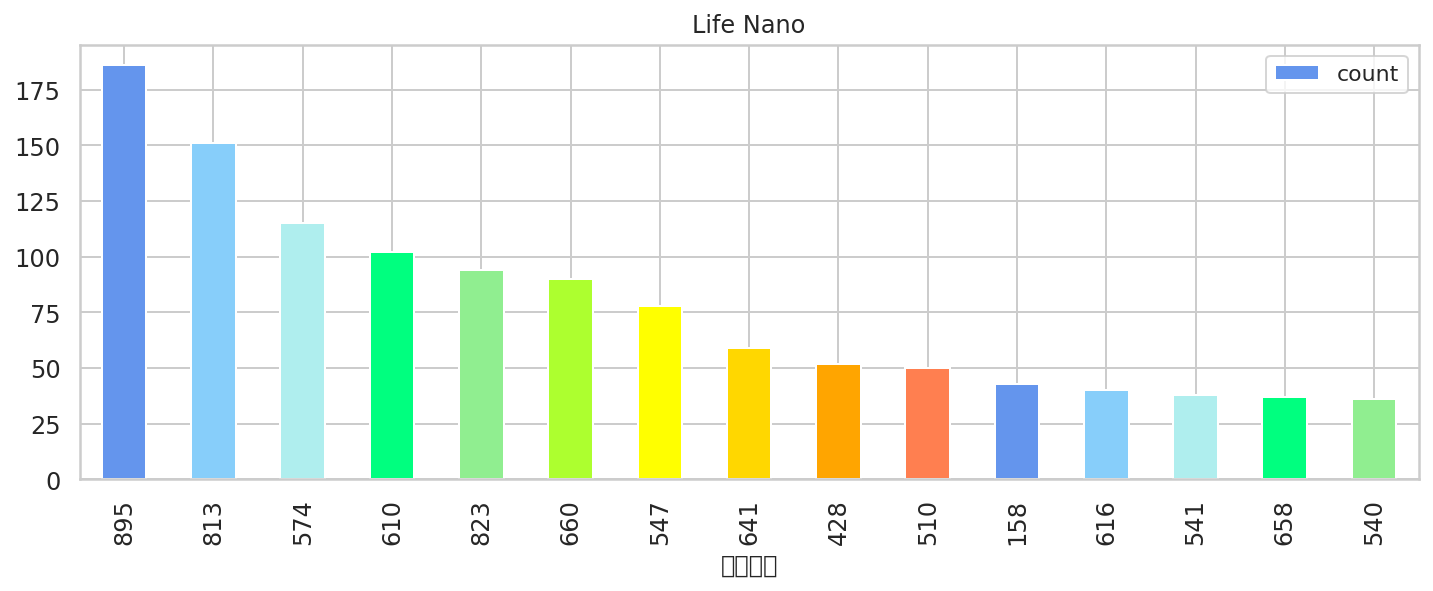

In [ ]:
ls = cso_ls.plot(kind='bar', x='청구기호', y='count', title='Life Nano', color=['cornflowerblue', 'lightskyblue','paleturquoise', 'springgreen',  'lightgreen', 'greenyellow','yellow','gold', 'orange', 'coral'], figsize=(12, 4), fontsize=12)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_te

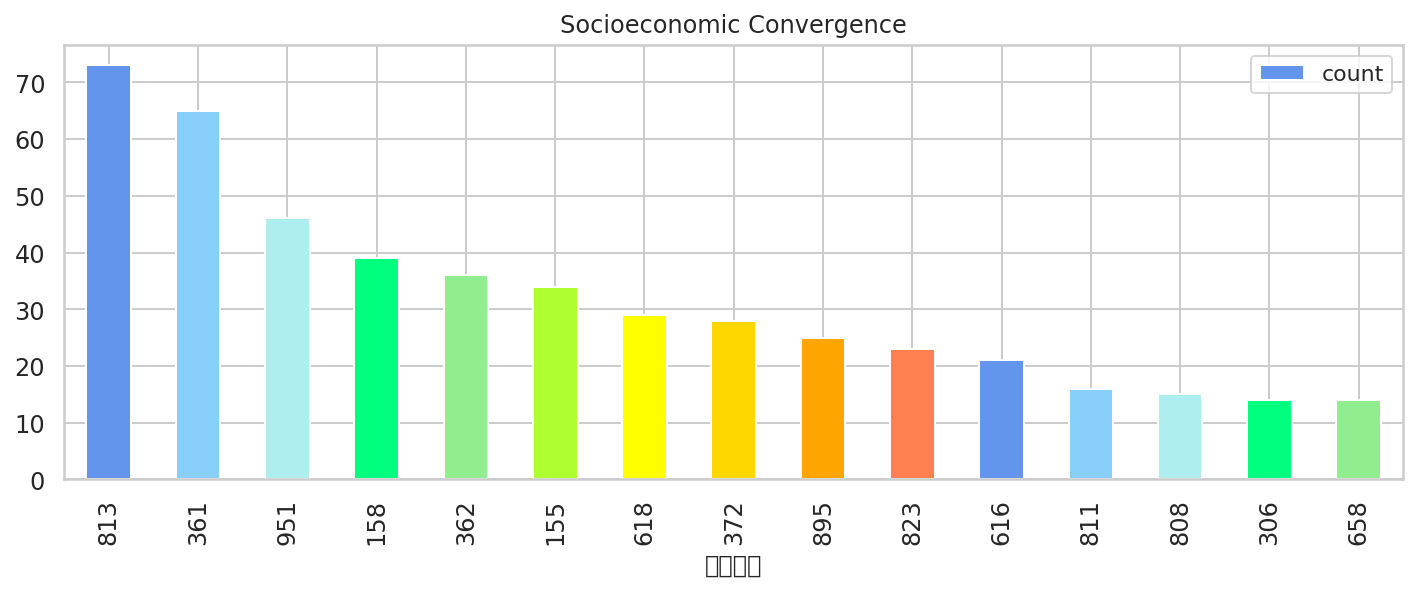

In [ ]:
se = cso_se.plot(kind='bar', x='청구기호', y='count', title='Socioeconomic Convergence', color=['cornflowerblue', 'lightskyblue','paleturquoise', 'springgreen',  'lightgreen', 'greenyellow','yellow','gold', 'orange', 'coral'], figsize=(12, 4), fontsize=12)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_te

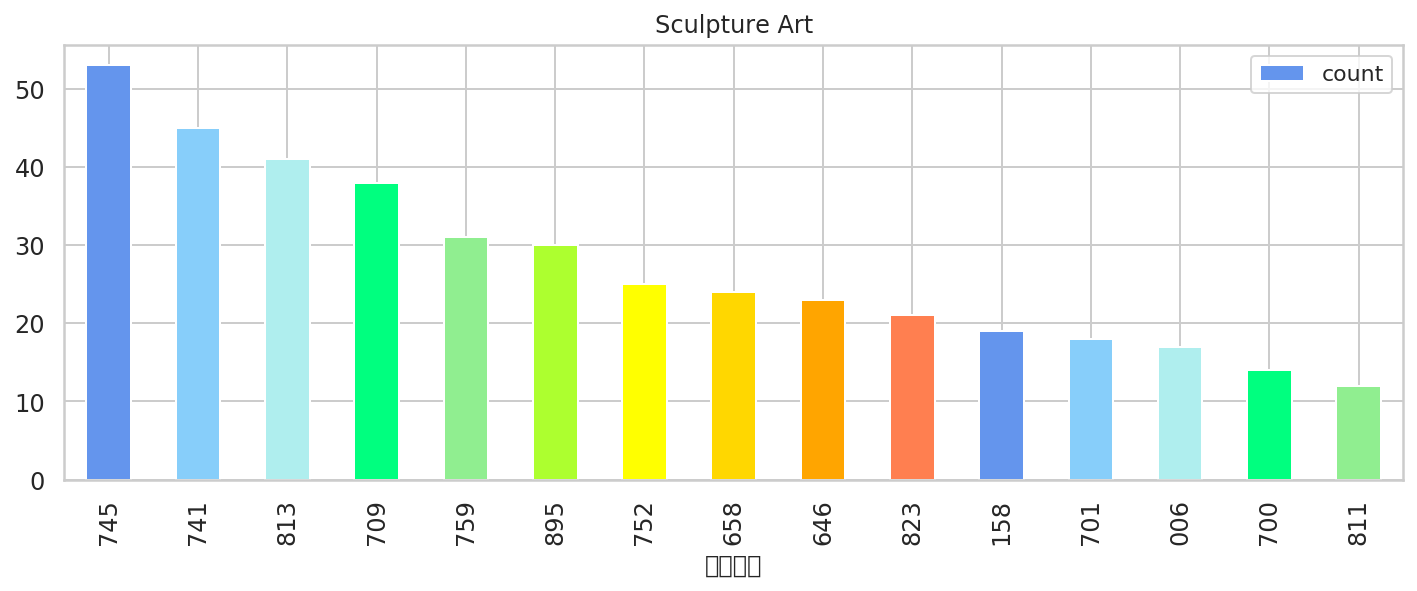

In [ ]:
art = cso_art.plot(kind='bar', x='청구기호', y='count', title='Sculpture Art', color=['cornflowerblue', 'lightskyblue','paleturquoise', 'springgreen',  'lightgreen', 'greenyellow','yellow','gold', 'orange', 'coral'], figsize=(12, 4), fontsize=12)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_te

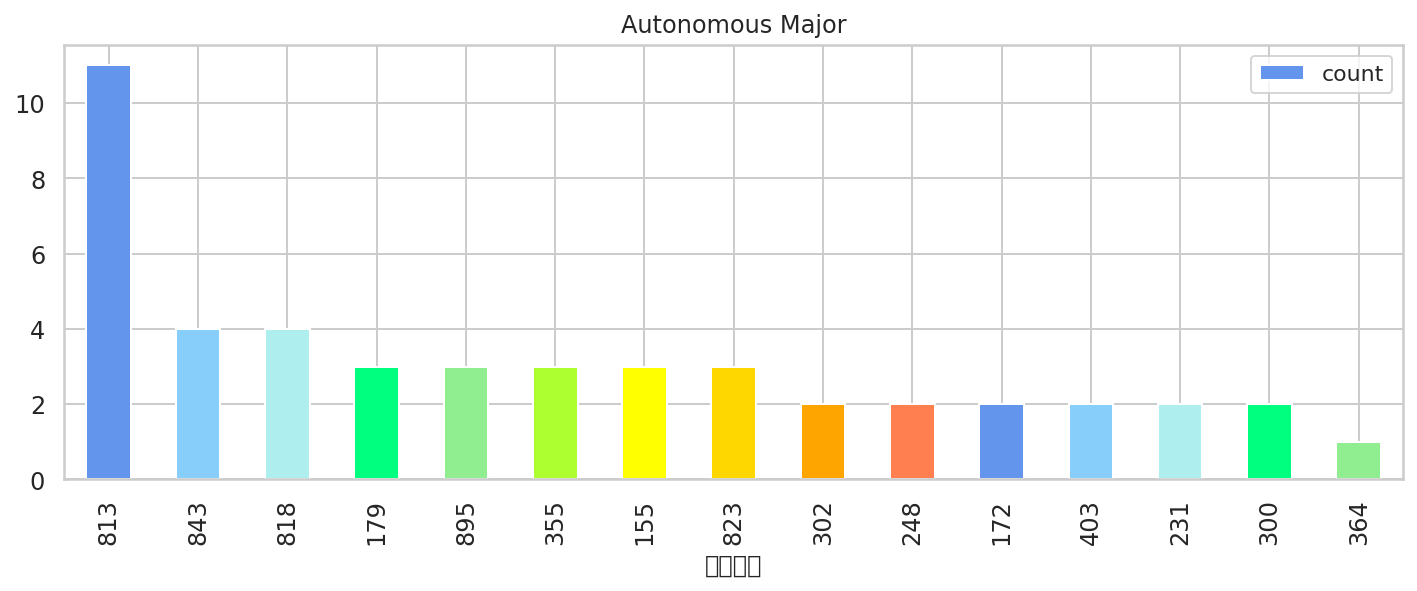

In [ ]:
free = cso_free.plot(kind='bar', x='청구기호', y='count', title='Autonomous Major', color=['cornflowerblue', 'lightskyblue','paleturquoise', 'springgreen',  'lightgreen', 'greenyellow','yellow','gold', 'orange', 'coral'], figsize=(12, 4), fontsize=12)

## 전체 데이터

### 코딩

In [ ]:
so_t = pd.concat([so_eg,so_edu,so_la,so_ec ,so_ss,so_ls , so_se,so_gb , so_art, so_free])
so_t = so_t.reset_index()

In [ ]:
so_t.청구기호 = so_t.청구기호.str.slice(0, 1)
so_t.대출일 = so_t.대출일.str.slice(4, 6)

In [ ]:
so_t.청구기호 = so_t.청구기호.str.pad(width=3, side='right', fillchar='0')

In [ ]:
cso_t = so_t.청구기호.value_counts().head(15)
cso_t = pd.DataFrame({'청구기호':cso_t.index, 'count':(cso_t.values/17516)*100})
cso_t['count'] = cso_t['count'].astype(int)

In [ ]:
dso_t = so_t.drop(['학과','서명'], axis=1)

In [ ]:
dso_t['청구기호']= dso_t['청구기호'].astype('int')
dso_t['대출일'] = dso_t['대출일'].astype('int')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_te

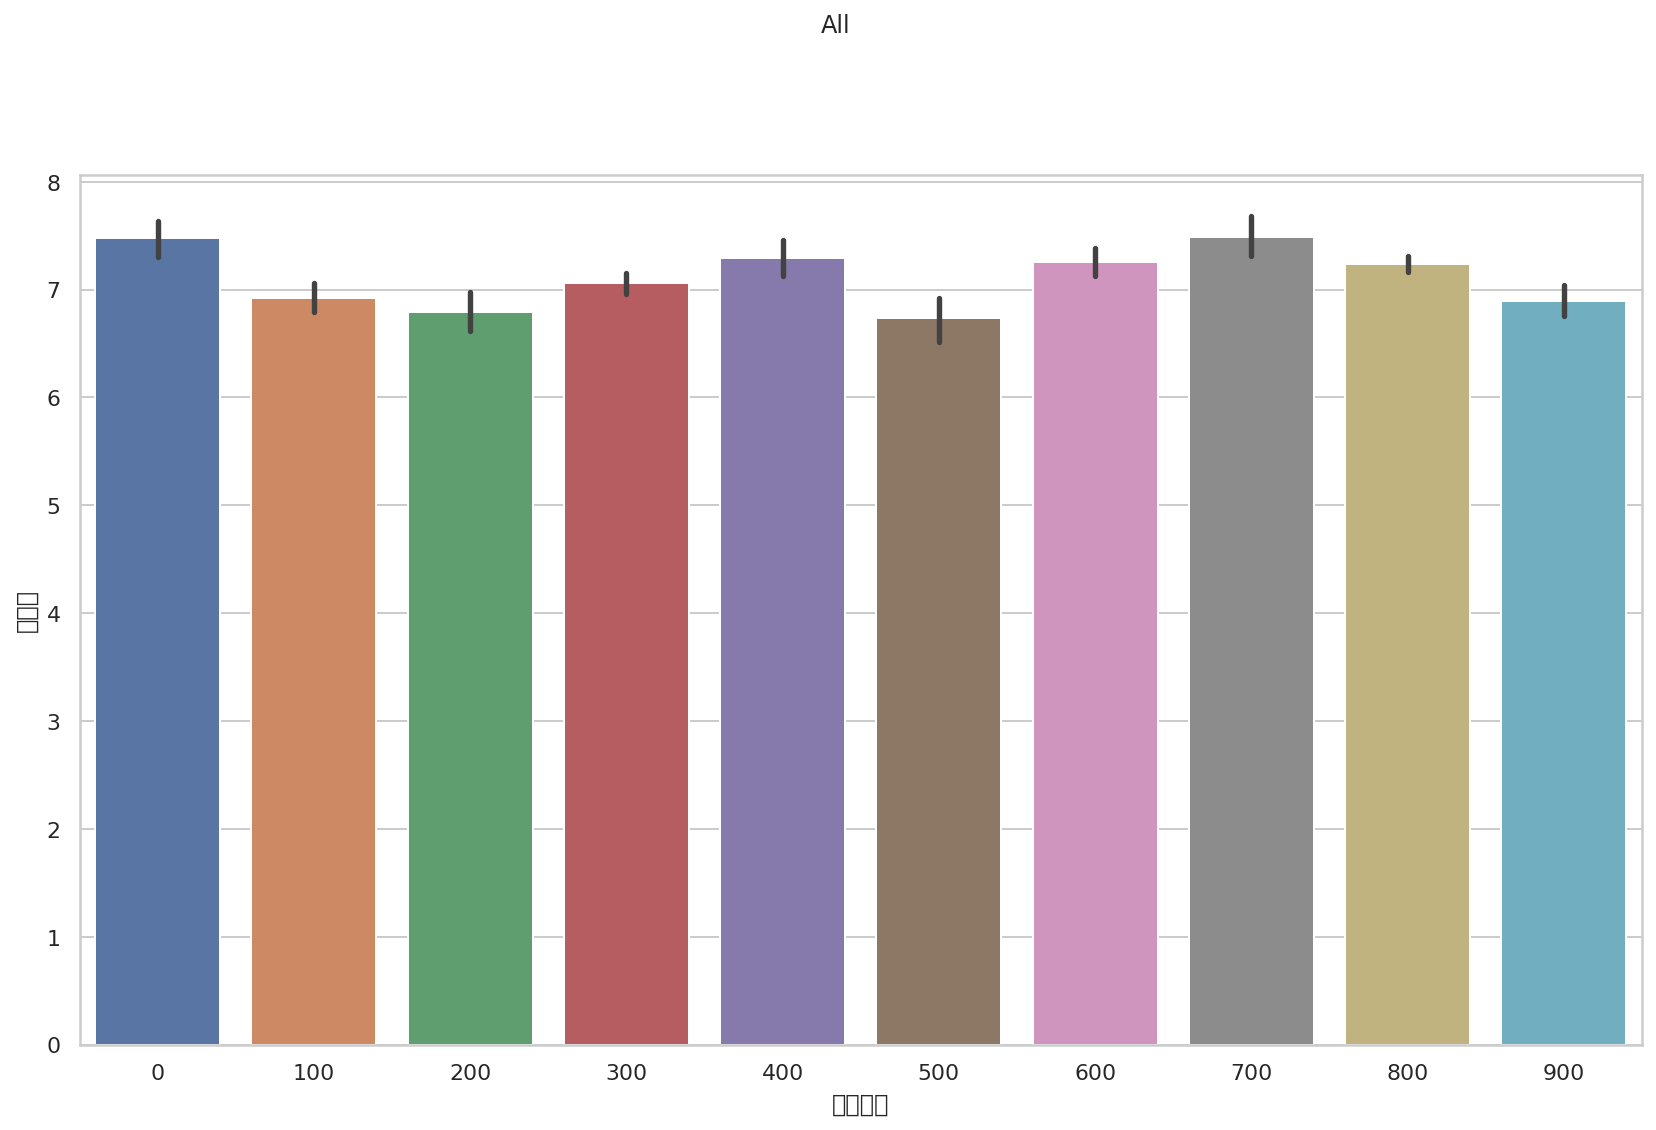

In [ ]:
sns.set_style("whitegrid")
sns.barplot(x="청구기호", y="대출일", data=dso_t)
plt.suptitle("All", y=1.02)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_

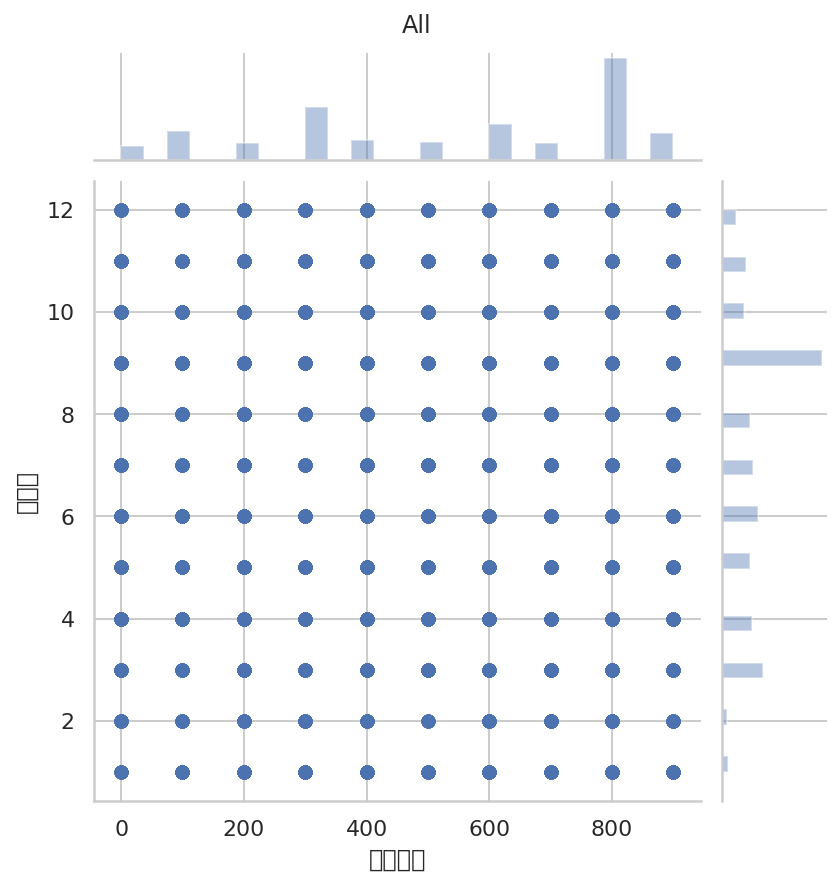

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=dso_t)
plt.suptitle("All", y=1.02)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_

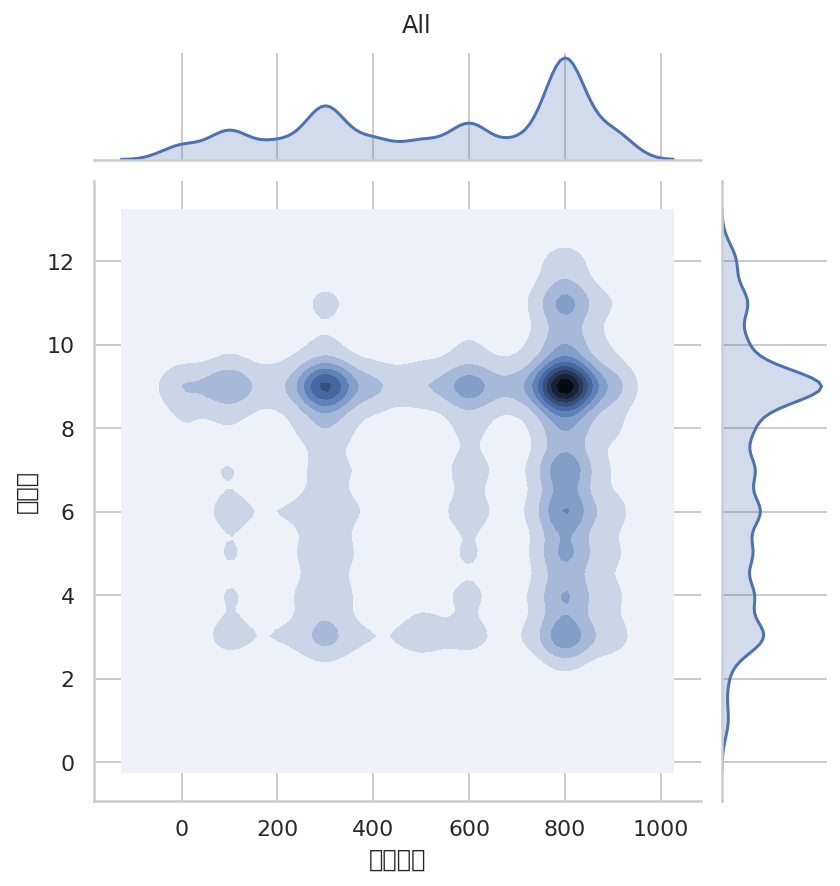

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=so_t, kind="kde")
plt.suptitle("All", y=1.02)
plt.show()

In [ ]:
so_tt = cso_t.plot(kind='bar', x='청구기호', y='count', title='Rental genre', color=['cornflowerblue', 'lightskyblue','paleturquoise', 'springgreen',  'lightgreen', 'greenyellow','yellow','gold', 'orange', 'coral'], figsize=(12, 4), fontsize=12)

NameError: ignored

In [ ]:
dso_t

,index,청구기호,대출일
0,1977,600,8
1,1978,900,12
2,1979,800,9
3,1980,800,7
4,1981,600,9
...,...,...,...
17511,27588,300,7
17512,27589,400,9
17513,27590,400,9
17514,27591,300,9


In [ ]:
dso_tt = so_t.groupby(['대출일', '청구기호']).size().reset_index()
print(dso_tt[dso_tt.대출일 == '12'])

    대출일 청구기호    0
110  12  000   10
111  12  100   42
112  12  200   23
113  12  300   66
114  12  400   81
115  12  500   48
116  12  600  103
117  12  700   54
118  12  800  195
119  12  900   36


### 요약

In [ ]:
sizes = cso_t['count']
colors = ['cornflowerblue', 'lightskyblue','paleturquoise', 'springgreen',  'lightgreen', 'greenyellow','yellow','gold', 'orange', 'coral']
explode = cso_t['count']
plt.title("Rental genre")
plt.pie(sizes , labels=cso_t['청구기호'], colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

NameError: ignored

> 선호 장르

    1위 800(30.85%) : 문학
    2위 300(16.06%) : 사회학
    3위 600(10.71%) : 기술과학
    4위 100(8.62%) : 철학
    5위 900(8.21%) : 역사

> 대출월별 청구기호

    1월 800(115) > 600(35) > 300(31) > 400(27)
    2월 800(78) > 300(46) > 300(37) > 100(24)
    3월 800(524) > 300(325) > 500(204) > 900(183)
    4월 800(404) > 300(251) > 600(146) > 900(141)
    5월 800(423) > 300(245) > 600(138) > 100, 900(137)
    6월 800(556) > 300(256) > 600(186) > 100(169)
    7월 800(522) > 600(186) > 300(167) > 100(131)
    8월 800(357) > 300(235) > 600(151) > 900(136)
    9월 800(1415) > 300(907) > 600(499) > 100(404)
    10월 800(348) > 300(123) > 600(122) > 900(92)
    11월 800(466) > 300(161) > 900(113) > 600(104)
    12월 800(195) > 600(103) > 400(81) > 300(66)
